In [1]:
from github import Github 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Data Cleaning & Processing

In [2]:
a = input('nhap acess token:')
g = Github(a)
repo_owner = 'wesbos'#'jgthms'
repo_name = 'React-For-Beginners-Starter-Files'#'bulma'
repo = g.get_repo(f"{repo_owner}/{repo_name}")

In [3]:
commit = repo.get_commits()

#### T√¨m c√°c ƒëu√¥i file c·ªßa c√°c file m·ªói l·∫ßn commit r·ªìi suy ra c√≥ nh·ªØng ng√¥n ng·ªØ n√†o :

In [4]:
data = []
for c in commit:
    r = c.raw_data
    for f in r.get('files'):
        language = f.get('filename').split('.')[-1]
        data.append(language)

In [5]:
data = pd.unique(data)
data

array(['npmrc', 'json', 'js', 'css', 'styl', 'md', 'gitignore', 'ico',
       'jpg', 'html', 'gitkeep', 'eot', 'svg', 'ttf', 'woff', 'eslintrc'],
      dtype=object)

#### T·ª´ ƒë√¢y ta c√≥ th·ªÉ k·∫øt lu·∫≠n c√≥ 4 ng√¥n ng·ªØ ƒë∆∞·ª£c s·ª≠ d·ª•ng: js:JavaScript, html:HTML,css: CSS,styl: Stylus, 
#### s·ªë c√≤n l·∫°i l√† nh·ªØng file kh√°c...

In [6]:
df = pd.DataFrame()
for c in commit:
    data = {}
    r = c.raw_data
    language = ''
    files_add_JavaScript=files_add_CSS=files_add_Stylus=files_add_HTML=files_add_other = 0
    files_delete_JavaScript=files_delete_CSS=files_delete_Stylus=files_delete_HTML=files_delete_other = 0
    files_change_JavaScript=files_change_CSS=files_change_Stylus=files_change_HTML=files_change_other = 0
    for f in r.get('files'):
        language = f.get('filename').split('.')[-1] if f.get('filename') != None else np.nan
        if language != np.nan:
            if language == 'js':
                files_add_JavaScript += f.get('additions')
                files_delete_JavaScript += f.get('deletions')
                files_change_JavaScript +=  f.get('changes')
            elif language == 'html' or language == 'htm':
                files_add_HTML += f.get('additions')
                files_delete_HTML += f.get('deletions')
                files_change_HTML +=  f.get('changes')
            elif language == 'css':
                files_add_CSS += f.get('additions')
                files_delete_CSS += f.get('deletions')
                files_change_CSS +=  f.get('changes')
            elif language == 'styl':
                files_add_Stylus += f.get('additions')
                files_delete_Stylus += f.get('deletions')
                files_change_Stylus +=  f.get('changes')
            else:
                files_add_other += f.get('additions')
                files_delete_other += f.get('deletions')
                files_change_other +=  f.get('changes')
            
    data.update({'sha':r.get('sha'),
                 'id_author':r.get('author').get('id') if r.get('author') != None else np.nan,
                 'login_author':r.get('author').get('login') if r.get('author') != None else np.nan ,
                 'name':r.get('commit').get('author').get('name'),
                 'email':r.get('commit').get('author').get('email'),
                 'date':r.get('commit').get('author').get('date'),
#                   'type':r.get('author').get('type'),
                 'message':r.get('commit').get('message'),
#                   'site_admin':r.get('author').get('site_admin'),
#                  'language':language,
                 'committer':r.get('commit').get('committer').get('name'),
                 'comment':r.get('commit').get('comment_count'),
                 
                 'files_add_JavaScript':files_add_JavaScript,
                 'files_delete_JavaScript':files_delete_JavaScript,
                 'files_change_JavaScript':files_change_JavaScript,
                 
                 'files_add_HTML':files_add_HTML,
                 'files_delete_HTML':files_delete_HTML,
                 'files_change_HTML':files_change_HTML,
                 
                 'files_add_CSS':files_add_CSS,
                 'files_delete_CSS':files_delete_CSS,
                 'files_change_CSS':files_change_CSS,
                
                 'files_add_Stylus':files_add_Stylus,
                 'files_delete_Stylus':files_delete_Stylus,
                 'files_change_Stylus':files_change_Stylus,
                
                 'files_add_other':files_add_other,
                 'files_delete_other':files_delete_other,
                 'files_change_other':files_change_other})
    df = pd.concat([df,pd.DataFrame(data,index = [0])],ignore_index=True)

In [7]:
df.date = pd.to_datetime(df.date)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   sha                      180 non-null    object             
 1   id_author                147 non-null    float64            
 2   login_author             147 non-null    object             
 3   name                     180 non-null    object             
 4   email                    180 non-null    object             
 5   date                     180 non-null    datetime64[ns, UTC]
 6   message                  180 non-null    object             
 7   committer                180 non-null    object             
 8   comment                  180 non-null    int64              
 9   files_add_JavaScript     180 non-null    int64              
 10  files_delete_JavaScript  180 non-null    int64              
 11  files_change_JavaScript  180 non

In [8]:
df_nan = df[df.isna().any(axis = 1)]
df_nan

sha  id_author login_author  \
17   3dab11e91092c1450fa1c6e87b14589f89a48127        NaN          NaN   
18   38956e290a37ffa99bbb9a072926cafed35ee342        NaN          NaN   
19   1c3a10f77a915bebb357a5de521685cb84a39d8d        NaN          NaN   
30   ca5802e4556fc3af48f78e5d0a053da880d7c2a5        NaN          NaN   
31   ff2d525e78257198fb5d8e85c3e05de4e329c084        NaN          NaN   
32   abfe0c028857dae7900d8bd215660c2adb577abc        NaN          NaN   
53   105bfa2e4e0687e422f6a93d413a3ee64ba1b35e        NaN          NaN   
59   7d8a18baee08c6fad9b0652552a8d4977269bc74        NaN          NaN   
64   5054105896fd56226c47cac5009c6c52946e9dce        NaN          NaN   
82   c90e246ecff3ca73eb5a3ad9a869a8a603db8dbf        NaN          NaN   
108  6431996d5d23853c0db39d1b105d6f39ab8f84f7        NaN          NaN   
109  df624d728362cc18af68f355a6c722dd55f0ac70        NaN          NaN   
110  12d03d565479c2707d29d5e7c3bb233060d3b173        NaN          NaN   
111  ca307501337a7fdd6e0337c8fa3e5dfe5bb02bcb        NaN          NaN   
112  6fb08972a71d3e448a680d3e3d6d77f8b6637121        NaN          NaN   
113  82ff59debbe1830bd9f9e5765e9ee7d22370393f        NaN          NaN   
114  a94594ff64bf12a0e6d71003bdd37c412cf5f0a6        NaN          NaN   
115  e808cbc6b145a0c0c3cd23bf2fe7010d3ea2df3b        NaN          NaN   
116  d1d53bc06c6a48aba35915e82dd3ca61159702dc        NaN          NaN   
117  bf82dd134113d381f27c69bfb30bb8884ac6d596        NaN          NaN   
118  8305138326cc63d9268fd657a618d9c5a800f2ce        NaN          NaN   
119  0feeefab205f9c267cd4ce476e83d8008475ca36        NaN          NaN   
120  d5db77983962b7034a9cdb73beab45b332b23b80        NaN          NaN   
121  9953f22213f5b38025411af43313c35f86050c28        NaN          NaN   
152  0bc48a5f9252f115583bed203b51a1abca3c63fa        NaN          NaN   
153  3ec8e0dd1b452362a49b5a3a265fc10a0de53c48        NaN          NaN   
154  58696e95da17ee7e3b8aff96b87defd41c199a0d        NaN          NaN   
155  c6972144dbc5a59150b450d71de1b17421c7b079        NaN          NaN   
156  8df71c227c046e95be67e9da207dfc6bd76f9bb8        NaN          NaN   
157  3ae230cae0943df301898d987bf3cd771ee01709        NaN          NaN   
158  92ee5109d31d10d05bca8a3d38cd9bbd2a2670a7        NaN          NaN   
159  cc50853ce8a50e127d40542aa3927ba1874c4fed        NaN          NaN   
168  1cdc9147be0841997e8384c14a26b8c52f99a6ff        NaN          NaN   

                  name                               email  \
17         Dom Gaulton          d.gaulton@catchdigital.com   
18         Dom Gaulton          d.gaulton@catchdigital.com   
19         Dom Gaulton          d.gaulton@catchdigital.com   
30      Ronan Connolly                 ronanc314@gmail.com   
31      Ronan Connolly                 ronanc314@gmail.com   
32      Ronan Connolly                 ronanc314@gmail.com   
53       Jessica Paoli                skullface@github.com   
59      Paul Schreiber             paul.schreiber@espn.com   
64        Paul McGrath                hello@paulmcgrath.me   
82      Douglas Rogers             doug@morrisonagency.com   
108  Charlotte Spencer        charlottelaspencer@gmail.com   
109  Charlotte Spencer        charlottelaspencer@gmail.com   
110  Charlotte Spencer        charlottelaspencer@gmail.com   
111  Charlotte Spencer        charlottelaspencer@gmail.com   
112  Charlotte Spencer        charlottelaspencer@gmail.com   
113  Charlotte Spencer        charlottelaspencer@gmail.com   
114  Charlotte Spencer        charlottelaspencer@gmail.com   
115  Charlotte Spencer        charlottelaspencer@gmail.com   
116  Charlotte Spencer        charlottelaspencer@gmail.com   
117  Charlotte Spencer        charlottelaspencer@gmail.com   
118  Charlotte Spencer        charlottelaspencer@gmail.com   
119  Charlotte Spencer        charlottelaspencer@gmail.com   
120  Charlotte Spencer        charlottelaspencer@gmail.com   
121  Charlotte Spencer        charlottelaspencer@gmail.com   
152      

In [9]:
# t√™n c·ªßa nh·ªØng ng∆∞·ªùi c√≥ login_author v√† id_author l√† nan
name_nan = df_nan.name.value_counts().shape[0]

In [10]:
df_nan.name.value_counts()

Charlotte Spencer    14
Jason Brady           6
Dom Gaulton           3
Ronan Connolly        3
Pawel Grzybek         2
Jessica Paoli         1
Paul Schreiber        1
Paul McGrath          1
Douglas Rogers        1
Elad Tsur             1
Name: name, dtype: int64

In [11]:
# l√†m s·∫°ch d·ªØ li·ªáu
# fillna v·ªõi login_author
# df.loc[df.isna().any(axis = 1),'login_author'] = df_nan.name.apply(lambda x: x.lower().replace(' ', ''))
df.loc[df.isna().any(axis = 1),'login_author'] = df_nan.name.apply(lambda x: df[df.name == x][df[df.name == x].notna().all(axis = 1)].login_author.iloc[0]
                                                                if (df[df.name == x][df[df.name == x].notna().all(axis = 1)].login_author.shape[0] !=0)
                                                                else x.lower().replace(' ', ''))

In [12]:
# fillna v·ªõi id_author
id_author_max = df.id_author.max()
id_author_fmax = df[df.id_author != id_author_max].id_author.max()
step = int((id_author_max-1 - id_author_fmax-1)/(name_nan-1))

In [13]:
arr_id_author_nan = np.arange(id_author_fmax+1,id_author_max,step)
arr_id_author_nan

array([49292622., 50163754., 51034886., 51906018., 52777150., 53648282.,
       54519414., 55390546., 56261678., 57132810.])

In [14]:
list_author = {k:v for k,v in zip(np.unique(df_nan.name.values),arr_id_author_nan)}
list_author

{'Charlotte Spencer': 49292622.0,
 'Dom Gaulton': 50163754.0,
 'Douglas Rogers': 51034886.0,
 'Elad Tsur': 51906018.0,
 'Jason Brady': 52777150.0,
 'Jessica Paoli': 53648282.0,
 'Paul McGrath': 54519414.0,
 'Paul Schreiber': 55390546.0,
 'Pawel Grzybek': 56261678.0,
 'Ronan Connolly': 57132810.0}

In [15]:
# ho√†n th√†nh fillna id_author
# df.loc[df.isna().any(axis = 1),'id_author'] = df_nan.name.apply(lambda x: list_author.get(x))
df.loc[df.isna().any(axis = 1),'id_author'] = df_nan.name.apply(lambda x: df[df.name == x][df[df.name == x].notna().all(axis = 1)].id_author.iloc[0]
                                                                if (df[df.name == x][df[df.name == x].notna().all(axis = 1)].id_author.shape[0] !=0)
                                                                else list_author.get(x))

In [16]:
# ki·ªÉm tra l·∫°i c√≤n nan kh√¥ng
df[df.isna().any(axis = 1)]

Empty DataFrame
Columns: [sha, id_author, login_author, name, email, date, message, committer, comment, files_add_JavaScript, files_delete_JavaScript, files_change_JavaScript, files_add_HTML, files_delete_HTML, files_change_HTML, files_add_CSS, files_delete_CSS, files_change_CSS, files_add_Stylus, files_delete_Stylus, files_change_Stylus, files_add_other, files_delete_other, files_change_other]
Index: []

[0 rows x 24 columns]

In [17]:
df.id_author = df.id_author.astype(int)
df
#d·ªØ li·ªáu c·ªßa m·ªói l·∫ßn commit

sha  id_author login_author  \
0    26dde5d6cb71a6e8f4a7fc18e71ce088569cd03c     176013       wesbos   
1    5a67f810f8d258482b8289ddae10cc9d5298c355     176013       wesbos   
2    651924a297224790fe37ad935f1362d8b2e40799    3828967        Asjas   
3    843e889fac96d9d11d56c37a67d9f454dffb2b7b     176013       wesbos   
4    fe85b50f6dbb335580b3b41cd82ab024f845d22a    3828967        Asjas   
..                                        ...        ...          ...   
175  559318fe06388e8a18ba2502cc1160454d0240a7     176013       wesbos   
176  c3878e213605d1d24d35b12ec0e5736acd097559     176013       wesbos   
177  af6e5271fc6dddded204ad7aecc4ece188204eb8     128755    vladikoff   
178  5f4c9cd20d143f1bcce32eaec23949afba631145     128755    vladikoff   
179  a5ac892aeb48a15f6544ad373086635d3bb4250d     176013       wesbos   

              name                    email                      date  \
0          Wes Bos         wesbos@gmail.com 2022-01-07 16:43:14+00:00   
1          Wes Bos         wesbos@gmail.com 2022-01-07 16:42:57+00:00   
2         A-J Roos            asjas@hey.com 2022-01-07 13:01:33+00:00   
3          Wes Bos         wesbos@gmail.com 2021-11-23 21:07:15+00:00   
4         A-J Roos            asjas@hey.com 2021-11-23 20:56:50+00:00   
..             ...                      ...                       ...   
175        Wes Bos         wesbos@gmail.com 2015-10-30 21:50:29+00:00   
176        Wes Bos         wesbos@gmail.com 2015-10-30 21:49:57+00:00   
177  Vlad Filippov  vlad.filippov@gmail.com 2015-10-30 20:43:28+00:00   
178  Vlad Filippov  vlad.filippov@gmail.com 2015-10-30 20:42:35+00:00   
179         wesbos         wesbos@gmail.com 2015-10-30 19:55:13+00:00   

                                               message      committer  \
0    Merge pull request #183 from Asjas/create-npmr...         GitHub   
1    Merge pull request #180 from Asjas/add-missing...         GitHub   
2                                    create npmrc file       A-J Roos   
3    Merge pull request #182 from Asjas/update-npm-...         GitHub   
4       update finished app npm packages and lock-file       A-J Roos   
..                                                 ...            ...   
175  Merge pull request #1 from vladikoff/patch-1\n...        Wes Bos   
176  Merge pull request #2 from vladikoff/patch-2\n...        Wes Bos   
177                                           Fix typo  Vlad Filippov   
178                           Removed extra line break  Vlad Filippov   
179                                Added Starter files         wesbos   

     comment  files_add_JavaScript  ...  files_change_HTML  files_add_CSS  \
0          0                     0  ...                  0              0   
1          0                     0  ...                  0              0   
2          0                     0  ...                  0              0   
3          0                     0  ...                  0              0   
4          0                     0  ...                  0              0   
..       ...                   ...  ...                ...            ...   
175        0                     0  ...                  0              0   
176        0                     1  ...                  0              0   
177        0                     1  ...                  0              0   
178        0                     0  ...                  0              0   
179        0                  3903  ...                330              0   

     files_delete_CSS  files_change_CSS  files_add_Stylus  \
0                   0                 0                 0   
1                   0                 0                 0   
2                   0                 0                 0   
3                   0                 0                 0   
4                   0                 0                 0   
..                ...               ...               ...   
175                 0                 0                 0  

In [18]:
# ki·ªÉm tra l·∫°i: t·∫•t c·∫£ c√°c th√¥ng tin v·ªÅ d·∫°ng chu·∫©n ch∆∞a?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype              
---  ------                   --------------  -----              
 0   sha                      180 non-null    object             
 1   id_author                180 non-null    int32              
 2   login_author             180 non-null    object             
 3   name                     180 non-null    object             
 4   email                    180 non-null    object             
 5   date                     180 non-null    datetime64[ns, UTC]
 6   message                  180 non-null    object             
 7   committer                180 non-null    object             
 8   comment                  180 non-null    int64              
 9   files_add_JavaScript     180 non-null    int64              
 10  files_delete_JavaScript  180 non-null    int64              
 11  files_change_JavaScript  180 non

### Data Analysis

In [19]:
# d·ªØ li·ªáu nan kh√¥ng do t·ª´ ph√≠a ng∆∞·ªùi d√πng, ph√¢n t√≠ch ƒë·ªÉ l√†m r√µ:
df_nan

sha  id_author login_author  \
17   3dab11e91092c1450fa1c6e87b14589f89a48127        NaN          NaN   
18   38956e290a37ffa99bbb9a072926cafed35ee342        NaN          NaN   
19   1c3a10f77a915bebb357a5de521685cb84a39d8d        NaN          NaN   
30   ca5802e4556fc3af48f78e5d0a053da880d7c2a5        NaN          NaN   
31   ff2d525e78257198fb5d8e85c3e05de4e329c084        NaN          NaN   
32   abfe0c028857dae7900d8bd215660c2adb577abc        NaN          NaN   
53   105bfa2e4e0687e422f6a93d413a3ee64ba1b35e        NaN          NaN   
59   7d8a18baee08c6fad9b0652552a8d4977269bc74        NaN          NaN   
64   5054105896fd56226c47cac5009c6c52946e9dce        NaN          NaN   
82   c90e246ecff3ca73eb5a3ad9a869a8a603db8dbf        NaN          NaN   
108  6431996d5d23853c0db39d1b105d6f39ab8f84f7        NaN          NaN   
109  df624d728362cc18af68f355a6c722dd55f0ac70        NaN          NaN   
110  12d03d565479c2707d29d5e7c3bb233060d3b173        NaN          NaN   
111  ca307501337a7fdd6e0337c8fa3e5dfe5bb02bcb        NaN          NaN   
112  6fb08972a71d3e448a680d3e3d6d77f8b6637121        NaN          NaN   
113  82ff59debbe1830bd9f9e5765e9ee7d22370393f        NaN          NaN   
114  a94594ff64bf12a0e6d71003bdd37c412cf5f0a6        NaN          NaN   
115  e808cbc6b145a0c0c3cd23bf2fe7010d3ea2df3b        NaN          NaN   
116  d1d53bc06c6a48aba35915e82dd3ca61159702dc        NaN          NaN   
117  bf82dd134113d381f27c69bfb30bb8884ac6d596        NaN          NaN   
118  8305138326cc63d9268fd657a618d9c5a800f2ce        NaN          NaN   
119  0feeefab205f9c267cd4ce476e83d8008475ca36        NaN          NaN   
120  d5db77983962b7034a9cdb73beab45b332b23b80        NaN          NaN   
121  9953f22213f5b38025411af43313c35f86050c28        NaN          NaN   
152  0bc48a5f9252f115583bed203b51a1abca3c63fa        NaN          NaN   
153  3ec8e0dd1b452362a49b5a3a265fc10a0de53c48        NaN          NaN   
154  58696e95da17ee7e3b8aff96b87defd41c199a0d        NaN          NaN   
155  c6972144dbc5a59150b450d71de1b17421c7b079        NaN          NaN   
156  8df71c227c046e95be67e9da207dfc6bd76f9bb8        NaN          NaN   
157  3ae230cae0943df301898d987bf3cd771ee01709        NaN          NaN   
158  92ee5109d31d10d05bca8a3d38cd9bbd2a2670a7        NaN          NaN   
159  cc50853ce8a50e127d40542aa3927ba1874c4fed        NaN          NaN   
168  1cdc9147be0841997e8384c14a26b8c52f99a6ff        NaN          NaN   

                  name                               email  \
17         Dom Gaulton          d.gaulton@catchdigital.com   
18         Dom Gaulton          d.gaulton@catchdigital.com   
19         Dom Gaulton          d.gaulton@catchdigital.com   
30      Ronan Connolly                 ronanc314@gmail.com   
31      Ronan Connolly                 ronanc314@gmail.com   
32      Ronan Connolly                 ronanc314@gmail.com   
53       Jessica Paoli                skullface@github.com   
59      Paul Schreiber             paul.schreiber@espn.com   
64        Paul McGrath                hello@paulmcgrath.me   
82      Douglas Rogers             doug@morrisonagency.com   
108  Charlotte Spencer        charlottelaspencer@gmail.com   
109  Charlotte Spencer        charlottelaspencer@gmail.com   
110  Charlotte Spencer        charlottelaspencer@gmail.com   
111  Charlotte Spencer        charlottelaspencer@gmail.com   
112  Charlotte Spencer        charlottelaspencer@gmail.com   
113  Charlotte Spencer        charlottelaspencer@gmail.com   
114  Charlotte Spencer        charlottelaspencer@gmail.com   
115  Charlotte Spencer        charlottelaspencer@gmail.com   
116  Charlotte Spencer        charlottelaspencer@gmail.com   
117  Charlotte Spencer        charlottelaspencer@gmail.com   
118  Charlotte Spencer        charlottelaspencer@gmail.com   
119  Charlotte Spencer        charlottelaspencer@gmail.com   
120  Charlotte Spencer        charlottelaspencer@gmail.com   
121  Charlotte Spencer        charlottelaspencer@gmail.com   
152      

In [20]:
# s·ªë l·∫ßn commit c·ªßa t·ª´ng ng∆∞·ªùi trong d·ªØ li·ªáu nan v√† trong d·ªØ li·ªáu g·ªëc
p = pd.concat([df[df.name.apply(lambda x: x in np.unique(df_nan.name.values))].name.value_counts(),
               df_nan.name.value_counts()],axis = 1,keys=['root','nan'])
p['compare'] = p.root == p.nan
p

root  nan  compare
Charlotte Spencer    14   14     True
Jason Brady           6    6     True
Dom Gaulton           4    3    False
Ronan Connolly        3    3     True
Pawel Grzybek         2    2     True
Jessica Paoli         1    1     True
Paul Schreiber        1    1     True
Paul McGrath          1    1     True
Douglas Rogers        1    1     True
Elad Tsur             1    1     True

In [21]:
p[p['compare'] == False]

root  nan  compare
Dom Gaulton     4    3    False

In [22]:
p[p['compare'] == False].index

Index(['Dom Gaulton'], dtype='object')

In [23]:
# s·ªë ng∆∞·ªùi trong d·ªØ li·ªáu n√†y
df_nan.name.value_counts()

Charlotte Spencer    14
Jason Brady           6
Dom Gaulton           3
Ronan Connolly        3
Pawel Grzybek         2
Jessica Paoli         1
Paul Schreiber        1
Paul McGrath          1
Douglas Rogers        1
Elad Tsur             1
Name: name, dtype: int64

In [24]:
df_nan.name.value_counts().shape[0]

10

In [25]:
# th·ªùi gian b·∫Øt ƒë·∫ßu, k·∫øt th√∫c
[df_nan.date.min(),df_nan.date.max()]

[Timestamp('2015-11-04 20:02:24+0000', tz='UTC'),
 Timestamp('2019-08-08 09:51:05+0000', tz='UTC')]

In [26]:
df_nanl = pd.melt(df_nan,id_vars = ['name'],value_vars = ['files_change_JavaScript','files_change_HTML','files_change_CSS','files_change_Stylus','files_change_other'])
df_nanl = df_nanl.groupby(by = 'variable').sum(numeric_only = True)
df_nanl
# suy ra ch·ªß y·∫øu l√† c√°c file CSS
# kh√¥ng c√≥ file n√†o l√† HTML

value
variable                      
files_change_CSS          1093
files_change_HTML            0
files_change_JavaScript     83
files_change_Stylus         87
files_change_other          93

In [27]:
# th√™m v√†o
df_nana = pd.melt(df_nan,id_vars = ['name'],value_vars = ['files_add_JavaScript','files_add_HTML','files_add_CSS','files_add_Stylus','files_add_other'])
df_nana = df_nana.groupby(by = 'variable').sum(numeric_only = True)
df_nana

value
variable                   
files_add_CSS           508
files_add_HTML            0
files_add_JavaScript     48
files_add_Stylus         48
files_add_other          70

In [28]:
# X√≥a ƒëi
pd.DataFrame(data = df_nanl.value.values - df_nana.value.values,
             index = ['files_delete_CSS','files_delete_HTML','files_delete_JavaScript',
                      'files_delete_Stylus','files_delete_other'])
# nh·∫≠n x√©t: kh√°c v·ªõi c√°c file kh√°c, s·ªë d√≤ng x√≥a ƒëi c·ªßa CSS l·∫°i l·ªõn h∆°n s·ªë d√≤ng th√™m v√†o c·ªßa d·ªØ li·ªáu n√†y.
# ƒêi·ªÅu n√†y c≈©ng d·ªÖ hi·ªÉu b·ªüi v√¨ c√≥ th·ªÉ code ƒë√£ ƒë∆∞·ª£c cho t·ª´ tr∆∞·ªõc, th√™m v√†o, x√≥a ƒëi ch·ªâ l√† thay ƒë·ªïi sau n√†y, mi·ªÖn s·ªë d√≤ng 
# code trong file kh√¥ng √¢m

0
files_delete_CSS         585
files_delete_HTML          0
files_delete_JavaScript   35
files_delete_Stylus       39
files_delete_other        23

In [29]:
# committer
df_nan.committer.value_counts()

GitHub            15
Jason Brady        6
Dom Gaulton        3
Ronan Connolly     3
Pawel Grzybek      2
Jessica Paoli      1
Paul Schreiber     1
Douglas Rogers     1
Elad Tsur          1
Name: committer, dtype: int64

In [30]:
df_nan.committer.value_counts().shape[0]

9

In [31]:
# message
df_nan.message.value_counts()

complied css                                                                                                        1
fix: typo in security rules for solution 14                                                                         1
Add ReactDOM changes that are missing                                                                               1
Change folder name for #8 to #9 to match videos                                                                     1
Missing line from #8                                                                                                1
Missing code from episode #16                                                                                       1
Code from end of 19 put in 19's folder                                                                              1
Revert "Code from end of 19 put in 19's folder"\n\nThis reverts commit c6972144dbc5a59150b450d71de1b17421c7b079.    1
Readme update: Using npm without sudo                   

In [32]:
df_nmes = df_nan.message.apply(lambda x: x.split(' ')[:2])
df_nmes.value_counts()

[fix:, typo]            13
[fix:, typos]            1
[Add, ReactDOM]          1
[Change, folder]         1
[Missing, line]          1
[Missing, code]          1
[Code, from]             1
[Revert, "Code]          1
[Readme, update:]        1
[spell, fix]             1
[complied, css]          1
[compiled, css]          1
[updated, images]        1
[Fixed, small]           1
[fix, grammatical]       1
[add, Firebase]          1
[Add, build]             1
[Add, now.json]          1
[Update, Finished]       1
[Updated, style]         1
[Change, Navigation]     1
Name: message, dtype: int64

In [33]:
# th√¥ng ƒëi·ªáp fix: typo in security rules for solution
# chi·∫øm bn ph·∫ßn trƒÉm tr√™n t·ªïng c√°c lo·∫°i message
df_nanmes = df_nan[df_nan.message.apply(lambda x: 'fix: typo in security rules for solution' in x)]
round(df_nanmes.shape[0]/df_nan.message.value_counts().shape[0]*100,1)

33.3

In [34]:
df.describe()

id_author     comment  files_add_JavaScript  \
count  1.800000e+02  180.000000            180.000000   
mean   1.174045e+07    0.022222             67.838889   
std    1.999605e+07    0.147817            461.800256   
min    1.159440e+05    0.000000              0.000000   
25%    1.760130e+05    0.000000              0.000000   
50%    1.760130e+05    0.000000              0.000000   
75%    8.589283e+06    0.000000              1.000000   
max    5.713282e+07    1.000000           4484.000000   

       files_delete_JavaScript  files_change_JavaScript  files_add_HTML  \
count               180.000000               180.000000      180.000000   
mean                 49.088889               116.927778        2.200000   
std                 329.291898               630.982005       24.747981   
min                   0.000000                 0.000000        0.000000   
25%                   0.000000                 0.000000        0.000000   
50%                   0.000000                 0.000000        0.000000   
75%                   1.000000                 2.000000        0.000000   
max                3222.000000              4934.000000      330.000000   

       files_delete_HTML  files_change_HTML  files_add_CSS  files_delete_CSS  \
count         180.000000         180.000000     180.000000        180.000000   
mean            1.705556           3.905556      44.011111         44.866667   
std            19.746918          32.390891     400.584963        483.733148   
min             0.000000           0.000000       0.000000          0.000000   
25%             0.000000           0.000000       0.000000          0.000000   
50%             0.000000           0.000000       0.000000          0.000000   
75%             0.000000           0.000000       0.000000          0.000000   
max           264.000000         330.000000    5168.000000       6450.000000   

       files_change_CSS  files_add_Stylus  files_delete_Stylus  \
count        180.000000        180.000000           180.000000   
mean          88.877778         50.322222            43.288889   
std          626.866845        470.328373           369.884377   
min            0.000000          0.000000             0.000000   
25%            0.000000          0.000000             0.000000   
50%            0.000000          0.000000             0.000000   
75%            0.000000          0.000000             0.000000   
max         6450.000000       6122.000000          3607.000000   

       files_change_Stylus  files_add_other  files_delete_other  \
count           180.000000       180.000000          180.000000   
mean             93.611111      1710.850000         1053.944444   
std             635.658277      7878.336214         5244.780639   
min               0.000000         0.000000            0.000000   
25%               0.000000         0.000000            0.000000   
50%               0.000000         1.000000            1.000000   
75%               0.000000         4.250000            2.000000   
max            6122.000000     74966.000000        44491.000000   

       files_change_other  
count          180.000000  
mean          2764.794444  
std          12510.888586  
min              0.000000  
25%              0.000000  
50%              2.000000  
75%              7.000000  
max         113337.000000

In [35]:
# c√≥ bao nhi√™u ng∆∞·ªùi commit,s·ªë l·∫ßn commit c·ªßa t·ª´ng ng∆∞·ªùi?
print(df.name.value_counts().shape[0])
df.name.value_counts()

44


Wes Bos               82
wesbos                20
Charlotte Spencer     14
Jason Brady            6
A-J Roos               6
Dom Gaulton            4
Chad Fawcett           3
Ronan Connolly         3
benwis                 2
Pawel Grzybek          2
Brett Wise             2
Alexander Popitich     2
Vlad Filippov          2
Matt Wood              2
Aadesh Shrestha        1
Ben Brown              1
Elad Tsur              1
K. Adam White          1
Rian Rainey            1
Mauricio Paternina     1
Tyler Murphy           1
Leonardo Balter        1
Kelly de Vries         1
Ray Clanan             1
Steve Skladany         1
damsalem               1
Joe Martella           1
Mark Skelton           1
Josh Addington         1
Simeon Vincent         1
Jessica Paoli          1
Thorsten Frommen       1
Erik Frelund           1
sxnaprkhr              1
Bridger Putnam         1
Henry Thiemann         1
j0weiss                1
Douglas Rogers         1
Andrejs Kuzmins        1
Steve Reid             1


In [36]:
# ai commit nhi·ªÅu nh·∫•t?
df.name.value_counts().index[0]

'Wes Bos'

In [37]:
# c√≥ bao nhi√™u ng∆∞·ªùi ch·ªâ commit 1 l·∫ßn
df.name.value_counts()[df.name.value_counts().values == 1].count()

30

In [38]:
# kh√¥ng t√≠nh other, ch·ªâ c√≥ 4 ng√¥n ng·ªØ ƒë∆∞·ª£c s·ª≠ d·ª•ng, ng√¥n ng·ªØ n√†o ƒë∆∞·ª£c s·ª≠ d·ª•ng(t√°c ƒë·ªông) nhi·ªÅu nh·∫•t?
df_lang = pd.melt(df,id_vars = ['name'],value_vars = ['files_change_JavaScript','files_change_HTML','files_change_CSS','files_change_Stylus'])
f = df_lang.groupby(by = 'variable').sum(numeric_only = True).sort_values(by = 'value',ascending = False)
f

value
variable                      
files_change_JavaScript  21047
files_change_Stylus      16850
files_change_CSS         15998
files_change_HTML          703

In [39]:
f.iloc[0]

value    21047
Name: files_change_JavaScript, dtype: int64

In [40]:
# m·ªói lo·∫°i chi·∫øm bao nhi√™u ph·∫ßn trƒÉm
f['rate'] = round(f.value/f.value.sum()*100,1)
f.rate

variable
files_change_JavaScript    38.5
files_change_Stylus        30.9
files_change_CSS           29.3
files_change_HTML           1.3
Name: rate, dtype: float64

In [41]:
f

value  rate
variable                            
files_change_JavaScript  21047  38.5
files_change_Stylus      16850  30.9
files_change_CSS         15998  29.3
files_change_HTML          703   1.3

In [42]:
# s·ªë d√≤ng c·ªßa file th√™m v√†o, x√≥a ƒëi, thay ƒë·ªïi nhi·ªÅu nh·∫•t,
# v√†o th·ªùi gian n√†o c·ªßa t·ª´ng file
df_time = pd.melt(df,id_vars = ['date','name'],value_vars = df.loc[:,'files_add_JavaScript':'files_change_Stylus'])
idx_max = df_time.groupby(by = ['variable'])['value'].transform(max) == df_time['value']
df_timegr = df_time[idx_max]
df_timegr.index = df_timegr.variable
df_timegr = df_timegr.drop('variable',axis = 1)
df_timegr

date     name  value
variable                                                         
files_add_JavaScript    2018-02-27 15:08:25+00:00  Wes Bos   4484
files_delete_JavaScript 2018-02-12 16:32:20+00:00  Wes Bos   3222
files_change_JavaScript 2018-02-27 15:08:25+00:00  Wes Bos   4934
files_add_HTML          2015-10-30 19:55:13+00:00   wesbos    330
files_delete_HTML       2016-09-28 03:10:54+00:00   wesbos    264
files_change_HTML       2015-10-30 19:55:13+00:00   wesbos    330
files_add_CSS           2016-09-28 03:10:54+00:00   wesbos   5168
files_delete_CSS        2018-02-12 16:32:20+00:00  Wes Bos   6450
files_change_CSS        2018-02-12 16:32:20+00:00  Wes Bos   6450
files_add_Stylus        2015-10-30 19:55:13+00:00   wesbos   6122
files_delete_Stylus     2018-02-12 16:32:20+00:00  Wes Bos   3607
files_change_Stylus     2015-10-30 19:55:13+00:00   wesbos   6122

In [43]:
df_timegr.name.value_counts()
# Wes Bos v√† wesbos chia ƒë·ªÅu 2 v·ªã tr√≠ ng∆∞·ªùi t√°c ƒë·ªông nhi·ªÅu d√≤ng nh·∫•t c·ªßa c√°c file

Wes Bos    6
wesbos     6
Name: name, dtype: int64

In [44]:
# s·ªë l∆∞·ª£ng c√°c comment
df.comment.value_counts()

0    176
1      4
Name: comment, dtype: int64

In [45]:
# S·ªë committer
df.committer.value_counts()

GitHub                65
Wes Bos               41
wesbos                20
A-J Roos               6
Jason Brady            6
Dom Gaulton            4
Ronan Connolly         3
Chad Fawcett           3
Pawel Grzybek          2
Brett Wise             2
Alexander Popitich     2
Vlad Filippov          2
benwis                 2
Paul Schreiber         1
sxnaprkhr              1
Elad Tsur              1
K. Adam White          1
Rian Rainey            1
Steve Skladany         1
damsalem               1
Leonardo Balter        1
Kelly de Vries         1
Ray Clanan             1
Mark Skelton           1
Joe Martella           1
Steve Reid             1
JoshAddington          1
Ben Brown              1
Erik Frelund           1
Matt Wood              1
Jessica Paoli          1
j0weiss                1
Douglas Rogers         1
Andrejs Kuzmins        1
Henry Thiemann         1
Name: committer, dtype: int64

In [46]:
df.committer.value_counts().shape[0]

35

In [47]:
# s·ªë commiter l√† github
committer_github = df[df.committer == 'GitHub']
committer_github

sha  id_author      login_author  \
0    26dde5d6cb71a6e8f4a7fc18e71ce088569cd03c     176013            wesbos   
1    5a67f810f8d258482b8289ddae10cc9d5298c355     176013            wesbos   
3    843e889fac96d9d11d56c37a67d9f454dffb2b7b     176013            wesbos   
8    24328c7b20b8dd6ccadf3f0992363ea51efe1f6d     176013            wesbos   
9    25307e54e35c4cd5ba940bac5be3f03d22a132b6   49292621           trsplms   
..                                        ...        ...               ...   
118  8305138326cc63d9268fd657a618d9c5a800f2ce   49292622  charlottespencer   
119  0feeefab205f9c267cd4ce476e83d8008475ca36   49292622  charlottespencer   
120  d5db77983962b7034a9cdb73beab45b332b23b80   49292622  charlottespencer   
121  9953f22213f5b38025411af43313c35f86050c28   49292622  charlottespencer   
122  34cfaf72f7f865c576e3ea37b0e383c0b836ed06     176013            wesbos   

                   name                                           email  \
0               Wes Bos                                wesbos@gmail.com   
1               Wes Bos                                wesbos@gmail.com   
3               Wes Bos                                wesbos@gmail.com   
8               Wes Bos                                wesbos@gmail.com   
9    Mauricio Paternina  49292621+spaceinvadev@users.noreply.github.com   
..                  ...                                             ...   
118   Charlotte Spencer                    charlottelaspencer@gmail.com   
119   Charlotte Spencer                    charlottelaspencer@gmail.com   
120   Charlotte Spencer                    charlottelaspencer@gmail.com   
121   Charlotte Spencer                    charlottelaspencer@gmail.com   
122             Wes Bos                                wesbos@gmail.com   

                         date  \
0   2022-01-07 16:43:14+00:00   
1   2022-01-07 16:42:57+00:00   
3   2021-11-23 21:07:15+00:00   
8   2021-02-02 16:25:36+00:00   
9   2021-02-02 16:11:35+00:00   
..                        ...   
118 2016-10-23 13:18:55+00:00   
119 2016-10-23 13:18:34+00:00   
120 2016-10-23 13:18:07+00:00   
121 2016-10-23 13:15:31+00:00   
122 2016-10-04 15:20:02+00:00   

                                               message committer  comment  \
0    Merge pull request #183 from Asjas/create-npmr...    GitHub        0   
1    Merge pull request #180 from Asjas/add-missing...    GitHub        0   
3    Merge pull request #182 from Asjas/update-npm-...    GitHub        0   
8    Merge pull request #154 from spaceinvadev/patc...    GitHub        0   
9    Add missing propTypes property (deleteFish)\n\...    GitHub        0   
..                                                 ...       ...      ...   
118        fix: typo in security rules for solution 11    GitHub        0   
119         fix: typo in security rules for solution 9    GitHub        0   
120         fix: typo in security rules for solution 6    GitHub        0   
121  fix: typos in security-rules.json for starter app    GitHub        0   
122  Merge pull request #18 from martellaj/master\n...    GitHub        0   

     files_add_JavaScript  ...  files_change_HTML  files_add_CSS  \
0                       0  ...                  0              0   
1                       0  ...                  0              0   
3                       0  ...                  0              0   
8                       2  ...                  0              0   
9                       2  ...                  0              0   
..                    ...  ...                ...            ...   
118                     0  ...                  0              0   
119                     0  ...                  0              0   
120                     0  ...                  0              0   
121                     0  ...                  0              0   
122                     0  ...                  0              0   

     files_delete_CSS  files_change_CSS  files_add_Stylus  \
0   

In [48]:
committer_github.shape[0]

65

In [49]:
# c√≥ bao nhi√™u ng∆∞·ªùi c√≥ commiter l√† github
committer_github.name.value_counts()

Wes Bos               41
Charlotte Spencer     14
Mauricio Paternina     1
Tyler Murphy           1
Bridger Putnam         1
Matt Wood              1
Aadesh Shrestha        1
Manil                  1
Paul McGrath           1
Daniel Mohr            1
Thorsten Frommen       1
Simeon Vincent         1
Name: name, dtype: int64

In [50]:
committer_github.name.value_counts().shape[0]

12

In [51]:
# ng∆∞·ªùi n√†o c√≥ commiter l√† github commit nhi·ªÅu nh·∫•t
committer_github.name.value_counts().index[0]

'Wes Bos'

In [52]:
# s·ªë ng∆∞·ªùi c√≥ commiter l√† github chi·∫øm bn ph·∫ßn trƒÉm
round(committer_github.name.value_counts().shape[0]/df.name.value_counts().shape[0]*100,1)

27.3

In [53]:
human = df.groupby(by = 'name').sum(numeric_only = True).reset_index()
human = human.drop(['id_author'],axis = 1)
human

name  comment  files_add_JavaScript  \
0             A-J Roos        0                     0   
1      Aadesh Shrestha        0                     1   
2   Alexander Popitich        0                     0   
3      Andrejs Kuzmins        0                     0   
4            Ben Brown        0                     0   
5           Brett Wise        0                     0   
6       Bridger Putnam        0                     0   
7         Chad Fawcett        0                     0   
8    Charlotte Spencer        0                     0   
9          Daniel Mohr        0                     9   
10         Dom Gaulton        0                     0   
11      Douglas Rogers        0                     3   
12           Elad Tsur        0                     1   
13        Erik Frelund        0                     0   
14      Henry Thiemann        0                     0   
15         Jason Brady        0                    40   
16       Jessica Paoli        0                     0   
17        Joe Martella        0                     0   
18      Josh Addington        0                     0   
19       K. Adam White        0                     0   
20      Kelly de Vries        0                     0   
21     Leonardo Balter        0                     0   
22               Manil        0                     0   
23        Mark Skelton        0                     0   
24           Matt Wood        1                    55   
25  Mauricio Paternina        0                     2   
26        Paul McGrath        0                     0   
27      Paul Schreiber        0                     4   
28       Pawel Grzybek        0                     0   
29          Ray Clanan        0                     1   
30         Rian Rainey        0                     0   
31      Ronan Connolly        0                     0   
32      Simeon Vincent        0                     0   
33          Steve Reid        0                     4   
34      Steve Skladany        1                     0   
35    Thorsten Frommen        0                     0   
36        Tyler Murphy        0                     0   
37       Vlad Filippov        0                     1   
38             Wes Bos        2                  6233   
39              benwis        0                     0   
40            damsalem        0                     0   
41             j0weiss        0                   159   
42           sxnaprkhr        0                     8   
43              wesbos        0                  5690   

    files_delete_JavaScript  files_change_JavaScript  files_add_HTML  \
0                         0                        0               0   
1                         1                        2               0   
2                         0                        0               0   
3                         0                        0               0   
4                         0                        0               0   
5                         0                        0               0   
6                         0                        0               0   
7                         0                        0               0   
8                         0                        0               0   
9                         9                       18               0   
10                        0                        0               0   
11                        3                        6               0   
12                        1                        2               0   
13                        0                        0               0   
14                        0                        0               0   
15                       27                       67               0   
16                        0                        0               0   
17                        0                        0               0   
18                        0                        0               0   
19          

In [54]:
wb = df[df.name == 'Wes Bos']

In [55]:
# Ng√¥n ng·ªØ commit nhi·ªÅu nh·∫•t c·ªßa wes bos: ƒë∆∞·ª£c t√≠nh theo s·ªë d√≤ng code thay ƒë·ªïi c·ªßa c√°c ng√¥n ng·ªØ
language_wb = pd.Series([wb.files_change_JavaScript.sum(),
                        wb.files_change_HTML.sum(),
                        wb.files_change_CSS.sum(),
                        wb.files_change_Stylus.sum(),
                        wb.files_change_other.sum()],index=['JavaScript','HTML','CSS','Stylus','other'])

In [56]:
language_wb = language_wb.sort_values(ascending=False)
language_wb

other         334559
JavaScript     11862
CSS             9561
Stylus          5626
HTML              93
dtype: int64

In [57]:
# other l√† c√°c file nh∆∞ text, readme... 
# Ng√¥n ng·ªØ commit nhi·ªÅu nh·∫•t c·ªßa wes bos
most_langwb = language_wb.index[0] if language_wb.index[0] != 'other' else language_wb.index[1]
most_langwb

'JavaScript'

In [58]:
# chi·∫øm bao nhi√™u ph·∫ßn trƒÉm so v·ªõi t·∫•t c·∫£
round(language_wb.loc[most_langwb]/language_wb.sum()*100,1)

3.3

In [59]:
# chi·∫øm bao nhi√™u ph·∫ßn trƒÉm ch·ªâ so v·ªõi c√°c ng√¥n ng·ªØ
round(language_wb.loc[most_langwb]/(language_wb.sum()-language_wb.loc['other'])*100,1)

43.7

In [60]:
# other chi·∫øm bao nhi√™u ph·∫ßn trƒÉm
round(language_wb.loc['other']/(language_wb.sum())*100,1) 

92.5

In [61]:
# th·ªùi gian commit ƒë·∫ßu v√† cu·ªëi c·ªßa t·ª´ng ng∆∞·ªùi:
df_t = df[['date','name']]

df_tmin = df_t.groupby('name').min()
df_tmin = df_tmin.rename(columns = {'date':'date_first'})

df_tmax = df_t.groupby('name').max()
df_tmax = df_tmax.rename(columns = {'date':'date_last'})

df_t = pd.concat([df_tmin,df_tmax],axis = 1)

df_t['period'] = df_t.date_last - df_t.date_first
df_t = df_t.sort_values(by = 'period',ascending = False)

df_t.head(15)

date_first                 date_last  \
name                                                                     
Wes Bos            2015-10-30 21:49:57+00:00 2022-01-07 16:43:14+00:00   
A-J Roos           2020-04-07 11:36:44+00:00 2022-01-07 13:01:33+00:00   
wesbos             2015-10-30 19:55:13+00:00 2016-09-29 20:14:27+00:00   
Dom Gaulton        2019-04-05 15:37:46+00:00 2019-08-08 09:51:05+00:00   
Alexander Popitich 2017-02-22 19:32:07+00:00 2017-03-06 19:04:38+00:00   
Jason Brady        2015-11-07 15:52:11+00:00 2015-11-07 20:26:27+00:00   
Chad Fawcett       2015-12-31 01:05:28+00:00 2015-12-31 01:36:35+00:00   
Matt Wood          2018-08-22 17:06:43+00:00 2018-08-22 17:36:21+00:00   
Ronan Connolly     2019-02-02 18:43:45+00:00 2019-02-02 19:06:33+00:00   
Pawel Grzybek      2015-11-08 07:27:08+00:00 2015-11-08 07:38:37+00:00   
benwis             2018-05-28 05:07:48+00:00 2018-05-28 05:16:20+00:00   
Charlotte Spencer  2016-10-23 13:15:31+00:00 2016-10-23 13:22:18+00:00   
Brett Wise         2016-12-19 16:20:26+00:00 2016-12-19 16:21:54+00:00   
Vlad Filippov      2015-10-30 20:42:35+00:00 2015-10-30 20:43:28+00:00   
Paul Schreiber     2018-03-22 21:15:42+00:00 2018-03-22 21:15:42+00:00   

                               period  
name                                   
Wes Bos            2260 days 18:53:17  
A-J Roos            640 days 01:24:49  
wesbos              335 days 00:19:14  
Dom Gaulton         124 days 18:13:19  
Alexander Popitich   11 days 23:32:31  
Jason Brady           0 days 04:34:16  
Chad Fawcett          0 days 00:31:07  
Matt Wood             0 days 00:29:38  
Ronan Connolly        0 days 00:22:48  
Pawel Grzybek         0 days 00:11:29  
benwis                0 days 00:08:32  
Charlotte Spencer     0 days 00:06:47  
Brett Wise            0 days 00:01:28  
Vlad Filippov         0 days 00:00:53  
Paul Schreiber        0 days 00:00:00

In [62]:
# ng∆∞·ªùi ho·∫°t ƒë·ªông l√¢u nh·∫•t
df_t.iloc[0]

date_first    2015-10-30 21:49:57+00:00
date_last     2022-01-07 16:43:14+00:00
period               2260 days 18:53:17
Name: Wes Bos, dtype: object

In [63]:
# c√≥ bao nhi√™u ng∆∞·ªùi c√≥ period l√† 0 days 00:00:00
df_t[df_t.period == '0 days 00:00:00'].shape[0]
# nh·∫≠n x√©t: t∆∞∆°ng ·ª©ng v·ªõi period 0 days 00:00:00, s·ªë commit c·ªßa 1 ng∆∞·ªùi ch·ªâ l√† 1 l·∫ßn

30

In [64]:
# t·ªïng s·ªë commit trong nƒÉm ƒë·∫ßu
df[df.date.apply(lambda x: x.year) == df.date.apply(lambda x: x.year).min()].shape[0]

52

In [65]:
# t·ªïng s·ªë commit trong nƒÉm cu·ªëi:
df[df.date.apply(lambda x: x.year) == df.date.apply(lambda x: x.year).max()].shape[0]

3

In [66]:
df_cmyear = df.groupby(df.date.apply(lambda x: x.year)).count().sha

In [67]:
# s·ªë commit theo t·ª´ng nƒÉm
df_cmyear = df_cmyear.sort_values(ascending=False)
df_cmyear

date
2015    52
2018    46
2016    35
2019    25
2017    10
2021     7
2022     3
2020     2
Name: sha, dtype: int64

In [68]:
# nƒÉm c√≥ s·ªë commit nhi·ªÅu nh·∫•t l√† bao nhi√™u:
[df_cmyear.index[0],df_cmyear.iloc[0]]

[2015, 52]

In [69]:
# nƒÉm c√≥ s·ªë commit √≠t nh·∫•t nh·∫•t, l√† bao nhi√™u:
[df_cmyear.index[-1],df_cmyear.iloc[-1]]

[2020, 2]

In [70]:
# k·ªÉ t·ª´ sau nƒÉm 2019, ai l√† ng∆∞·ªùi commit nhi·ªÅu nh·∫•t
df[df.date.apply(lambda x: x.year) >2019].name.value_counts()

A-J Roos              6
Wes Bos               5
Mauricio Paternina    1
Name: name, dtype: int64

In [71]:
# ng∆∞·ªùi commit nhi·ªÅu nh·∫•t theo t·ª´ng nƒÉm
commit_year = df.groupby([df.date.apply(lambda x: x.year),'name']).count().drop('date',axis = 1).reset_index()
cmit_year = commit_year[['date','name','sha']]
idx = cmit_year.groupby(['date'])['sha'].transform(max) == cmit_year['sha']
cmit_year = cmit_year[idx]
cmit_year.index = cmit_year.date
cmit_year = cmit_year.drop('date', axis = 1).rename(columns={'sha':'counts'})
cmit_year

name  counts
date                           
2015             wesbos      17
2016  Charlotte Spencer      14
2017            Wes Bos       5
2018            Wes Bos      32
2019            Wes Bos      14
2020           A-J Roos       1
2020            Wes Bos       1
2021           A-J Roos       4
2022            Wes Bos       2

In [72]:
# c√≥ bao nhi√™u ng∆∞·ªùi commit nhi·ªÅu nh·∫•t theo t·ª´ng nƒÉm
m = cmit_year.name.value_counts()
m

Wes Bos              5
A-J Roos             2
wesbos               1
Charlotte Spencer    1
Name: name, dtype: int64

In [73]:
# s·ªë l·∫ßn xu·∫•t hi·ªán c·ªßa ai nhi·ªÅu nh·∫•t
m.index[0]

'Wes Bos'

In [74]:
# chi·∫øm bao nhi√™u ph·∫ßn trƒÉm
round(m[0]/m.sum()*100,1)

55.6

In [75]:
df.message.value_counts()

:point_left: :point_left: :point_left: :point_left: :point_left: :point_left: :point_left:             4
Merge branch 'master' of github.com:wesbos/React-For-Beginners-Starter-Files                           4
Update readme.md                                                                                       2
üî•                                                                                                      2
Fix typo                                                                                               2
                                                                                                      ..
Merge pull request #70 from chowdhurian/patch-1\n\nCleaned up language in the To Start section         1
Cleaned up language in the To Start section\n\nA few suggested changes to make the meaning clearer.    1
Fixed small typo                                                                                       1
Add parseFloat to handleChange in EditFish          

In [76]:
df_mes = df.message.apply(lambda x: x.split(' ')[:2])
df_mes.value_counts()

[Merge, pull]                        47
[fix:, typo]                         13
[Merge, branch]                       5
[:point_left:, :point_left:]          4
[Fix, typo]                           2
                                     ..
[add, notes]                          1
[Update, StorePicker.js\n\nusing]     1
[add, Firebase]                       1
[Change, "current.value"]             1
[Added, Starter]                      1
Name: message, Length: 110, dtype: int64

In [77]:
# th√¥ng tin v·ªÅ message : merge pull request 
mes_merpull = df[df.message.apply(lambda x: 'Merge pull request' in x)]
mes_merpull

sha  id_author login_author  \
0    26dde5d6cb71a6e8f4a7fc18e71ce088569cd03c     176013       wesbos   
1    5a67f810f8d258482b8289ddae10cc9d5298c355     176013       wesbos   
3    843e889fac96d9d11d56c37a67d9f454dffb2b7b     176013       wesbos   
8    24328c7b20b8dd6ccadf3f0992363ea51efe1f6d     176013       wesbos   
10   9d9b0d8d06364b4d8615e8ae9984eee18e5c9c77     176013       wesbos   
12   689b5ecc6bad401c1cef80cd16f82e3b3144d089     176013       wesbos   
14   1014b8c8ec9a582f4c4e7021c928e5b9f41455d2     176013       wesbos   
23   23b054fbb4c29d6eb2516aecdfdc60baccf43e77     176013       wesbos   
25   3361d425fba101de0b38d1e5b9deea44cc573b84     176013       wesbos   
27   09abf1f2622407d369c95aa22f583f8e2cf296b0     176013       wesbos   
28   a66ce9776f2e2d544af5bd4ebbfa2d35e57b41a6     176013       wesbos   
37   a165f16d5dd60ae2660eac30600ffe580880eebb     176013       wesbos   
38   6f8e16ad20f64e2f10deee3d289c70aa6e3ed302     176013       wesbos   
41   c3e68959ab839aaf93a364d8f8b82d3f79adf36c     176013       wesbos   
44   317737dafd57552563cbc4a887918d730a9bbc28     176013       wesbos   
46   e67994bd0d68d6038186d0f2767b3f47b92aeda3     176013       wesbos   
49   d0c2d13df4ec8b35fd422be1750862e5b210a6e0     176013       wesbos   
51   e3221a4ddb229880155977f56670d4cc719300fd     176013       wesbos   
56   2b947824db9bfe3253bd43a5a41980e4bd52ca24     176013       wesbos   
60   0a23d2f225c88ec906cf774c952950ed2fba7263     176013       wesbos   
61   e9eda1cac2a909006336a2477e666c0d79c27d35     176013       wesbos   
62   6e674a1002a19f354d035f9da41725776d62dccd     176013       wesbos   
81   ea16b50b1d59000ecc4aafe99e66ecc136fb2dbe     176013       wesbos   
83   29b1fbbd7ec01a55340cada70b1a411b097a15e6     176013       wesbos   
85   9c171adb32cd2075a3f1272e97f0258a6a902427     176013       wesbos   
87   ff5c2e2e4fce0066b980d837cf41722c31be26bd     176013       wesbos   
88   b412e8ab4f29d79465f7dd703b46b0efc2e1564d     176013       wesbos   
91   567ff2f5203fa646267470b9e9fc7aac08e709a5     176013       wesbos   
93   0215aa7808472bb9dd2df9ccb95cf21bd895e243     176013       wesbos   
94   846e2222240b87c22b5711ba4206caea49595b81     176013       wesbos   
98   a006eb89d0cd25b07eb83dffa2c802ebd64cc75c     176013       wesbos   
99   0f91133bca1d9ebabbecba7952e22a094e31c072     176013       wesbos   
101  68ed90dddfe8a2479c2595fc128a823810f94ebd     176013       wesbos   
103  c8258a189e650e30c82ded4db144f90336319b9a     176013       wesbos   
106  964d117c84a5e02b0f28bb0ff2519058c1ad4f18     176013       wesbos   
122  34cfaf72f7f865c576e3ea37b0e383c0b836ed06     176013       wesbos   
127  b9b785ed7fa0783012ea78f082ffcae077deccfb     176013       wesbos   
133  c37d5e776051b5c4ae6ba57dcafe9daab4e4d46b     176013       wesbos   
139  747bc9cc063b8ab4a95c2bf96176428de20361e6     176013       wesbos   
147  2a37556536b051ba9a64548660e9557353cecfbf     176013       wesbos   
149  5cf74022b4d5ac9a4619bf8bb19ab08df2274bbf     176013       wesbos   
151  a4c0ffa1df9f61607a4bd09ef4d3668f5d81244f     176013       wesbos   
163  e69cfada1fc68d9f8a24fef5e5547724c8242e62     176013       wesbos   
165  11dc353426561d31632fa8042485cfa42ebe1b27     176013       wesbos   
167  bf9a29d21c173efa8298fdb6674d94de3dddd7d0     176013       wesbos   
175  559318fe06388e8a18ba2502cc1160454d0240a7     176013       wesbos   
176  c3878e213605d1d24d35b12ec0e5736acd097559     176013       wesbos   

        name             email                      date  \
0    Wes Bos  wesbos@gmail.com 2022-01-07 16:43:14+00:00   
1    Wes Bos  wesbos@gmail.com 2022-01-07 16:42:57+00:00   
3    Wes Bos  wesbos@gmail.com 2021-11-23 21:07:15+00:00   
8    Wes Bos  wesbos@gmail.com 2021-02-02 16:25:36+00:00   
10   Wes Bos  wesbos@gmail.com 2020-04-30 16:09:54+00:00   
12   Wes Bos  wesbos@gmail.com 2019-12-16 20:43:12+00:00   
14   Wes Bos  wesbos@gmail.com 2019-12-16 20:41:05+00:00   
23   Wes Bos  wesbos@gmail.com 2019-03-26 14:12:05+00:00 

In [78]:
# s·ªë c√°c message c√≥ merge pull request l√† bao nhi√™u
mes_merpull.message.shape[0]

47

In [79]:
# chi·∫øm bao nhi√™u ph·∫ßn trƒÉm:
round(mes_merpull.shape[0]/df.shape[0]*100,1)

26.1

In [80]:
#ng∆∞·ªùi c√≥ message l√† merge pull request
mes_merpull.name.value_counts()
# suy ra ch·ªâ c√≥ wesbos l√†...

Wes Bos    47
Name: name, dtype: int64

In [81]:
# kho·∫£ng th·ªùi gian m√† message merge pull request
[mes_merpull.date.min(),mes_merpull.date.max()]

[Timestamp('2015-10-30 21:49:57+0000', tz='UTC'),
 Timestamp('2022-01-07 16:43:14+0000', tz='UTC')]

####  Data Visualization

In [82]:
df_copy = df.copy()

In [83]:
df_copy['year'] = df_copy.date.apply(lambda x: x.year)
df_copy['month'] = df_copy.date.apply(lambda x: x.month)
df_copy['day'] = df_copy.date.apply(lambda x: x.day)

df_g = df_copy.groupby(['year','month','day']).sum(numeric_only=True).reset_index()

In [84]:
df_g['date'] = pd.to_datetime(df_g[['year','month','day']])
df_g

year  month  day  id_author  comment  files_add_JavaScript  \
0   2015     10   30     961562        0                  3905   
1   2015     11    3     528039        0                    28   
2   2015     11    4   53052185        0                    14   
3   2015     11    5    1051393        0                     1   
4   2015     11    6     176013        0                     0   
..   ...    ...  ...        ...      ...                   ...   
75  2020      4   30     176013        0                     0   
76  2021      2    2   49468634        0                     4   
77  2021     11   19    3828967        0                     0   
78  2021     11   23   11662914        0                     0   
79  2022      1    7    4180993        0                     0   

    files_delete_JavaScript  files_change_JavaScript  files_add_HTML  \
0                         4                     3909             330   
1                        28                       56               0   
2                        14                       28               0   
3                         1                        2               0   
4                         0                        0               0   
..                      ...                      ...             ...   
75                        0                        0               0   
76                        2                        6               0   
77                        0                        0               0   
78                        0                        0               0   
79                        0                        0               0   

    files_delete_HTML  ...  files_add_CSS  files_delete_CSS  files_change_CSS  \
0                   0  ...              0                 0                 0   
1                   0  ...              0                 0                 0   
2                   0  ...              0                 0                 0   
3                   0  ...              0                 0                 0   
4                   0  ...              0                 0                 0   
..                ...  ...            ...               ...               ...   
75                  0  ...              0                 0                 0   
76                  0  ...              0                 0                 0   
77                  0  ...              0                 0                 0   
78                  0  ...              0                 0                 0   
79                  0  ...              0                 0                 0   

    files_add_Stylus  files_delete_Stylus  files_change_Stylus  \
0               6122                    0                 6122   
1                  0                    0                    0   
2                  0                    0                    0   
3                  0                    0                    0   
4                  0                    0                    0   
..               ...                  ...                  ...   
75                 0                    0                    0   
76                 0                    0                    0   
77                 0                    0                    0   
78                 0                    0                    0   
79                 0                    0                    0   

    files_add_other  files_delete_other  files_change_other       date  
0              4771                   0                4771 2015-10-30  
1                 9                   3                  12 2015-11-03  
2                25                   0                  25 2015-11-04  
3                 8                   3                  11 2015-11-05  
4                 3                   1                   4 2015-11-06  
..              ...                 ...                 ...        ...  
75             8540                6242               14782 2020-04-3

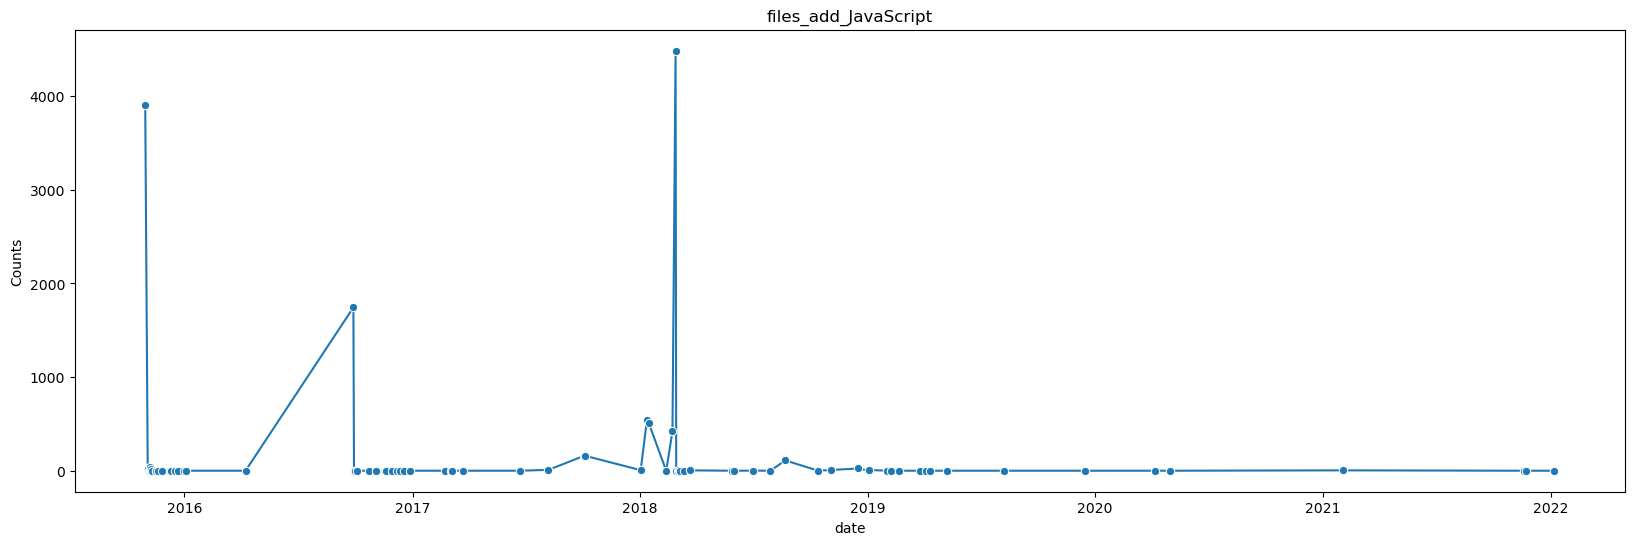

In [85]:
fig = plt.figure(figsize=(20,6))
sns.lineplot(data = df_g, x = df_g.date,y = 'files_add_JavaScript', marker = 'o')
plt.title('files_add_JavaScript')
plt.ylabel('Counts')
plt.show()

In [86]:
df_g.index = df_g['date']
df_g.drop('date',axis = 1)

year  month  day  id_author  comment  files_add_JavaScript  \
date                                                                     
2015-10-30  2015     10   30     961562        0                  3905   
2015-11-03  2015     11    3     528039        0                    28   
2015-11-04  2015     11    4   53052185        0                    14   
2015-11-05  2015     11    5    1051393        0                     1   
2015-11-06  2015     11    6     176013        0                     0   
...          ...    ...  ...        ...      ...                   ...   
2020-04-30  2020      4   30     176013        0                     0   
2021-02-02  2021      2    2   49468634        0                     4   
2021-11-19  2021     11   19    3828967        0                     0   
2021-11-23  2021     11   23   11662914        0                     0   
2022-01-07  2022      1    7    4180993        0                     0   

            files_delete_JavaScript  files_change_JavaScript  files_add_HTML  \
date                                                                           
2015-10-30                        4                     3909             330   
2015-11-03                       28                       56               0   
2015-11-04                       14                       28               0   
2015-11-05                        1                        2               0   
2015-11-06                        0                        0               0   
...                             ...                      ...             ...   
2020-04-30                        0                        0               0   
2021-02-02                        2                        6               0   
2021-11-19                        0                        0               0   
2021-11-23                        0                        0               0   
2022-01-07                        0                        0               0   

            files_delete_HTML  files_change_HTML  files_add_CSS  \
date                                                              
2015-10-30                  0                330              0   
2015-11-03                  0                  0              0   
2015-11-04                  0                  0              0   
2015-11-05                  0                  0              0   
2015-11-06                  0                  0              0   
...                       ...                ...            ...   
2020-04-30                  0                  0              0   
2021-02-02                  0                  0              0   
2021-11-19                  0                  0              0   
2021-11-23                  0                  0              0   
2022-01-07                  0                  0              0   

            files_delete_CSS  files_change_CSS  files_add_Stylus  \
date                                                               
2015-10-30                 0                 0              6122   
2015-11-03                 0                 0                 0   
2015-11-04                 0                 0                 0   
2015-11-05                 0                 0                 0   
2015-11-06                 0                 0                 0   
...                      ...               ...               ...   
2020-04-30                 0                 0                 0   
2021-02-02                 0                 0                 0   
2021-11-19                 0                 0                 0   
2021-11-23                 0                 0                 0   
2022-01-07                 0                 0                 0   

            files_delete_Stylus  files_change_Stylus  files_add_other  \
date                                                                    
2015-10-30                    0                 6122             4771   
2015-11-03                    0 

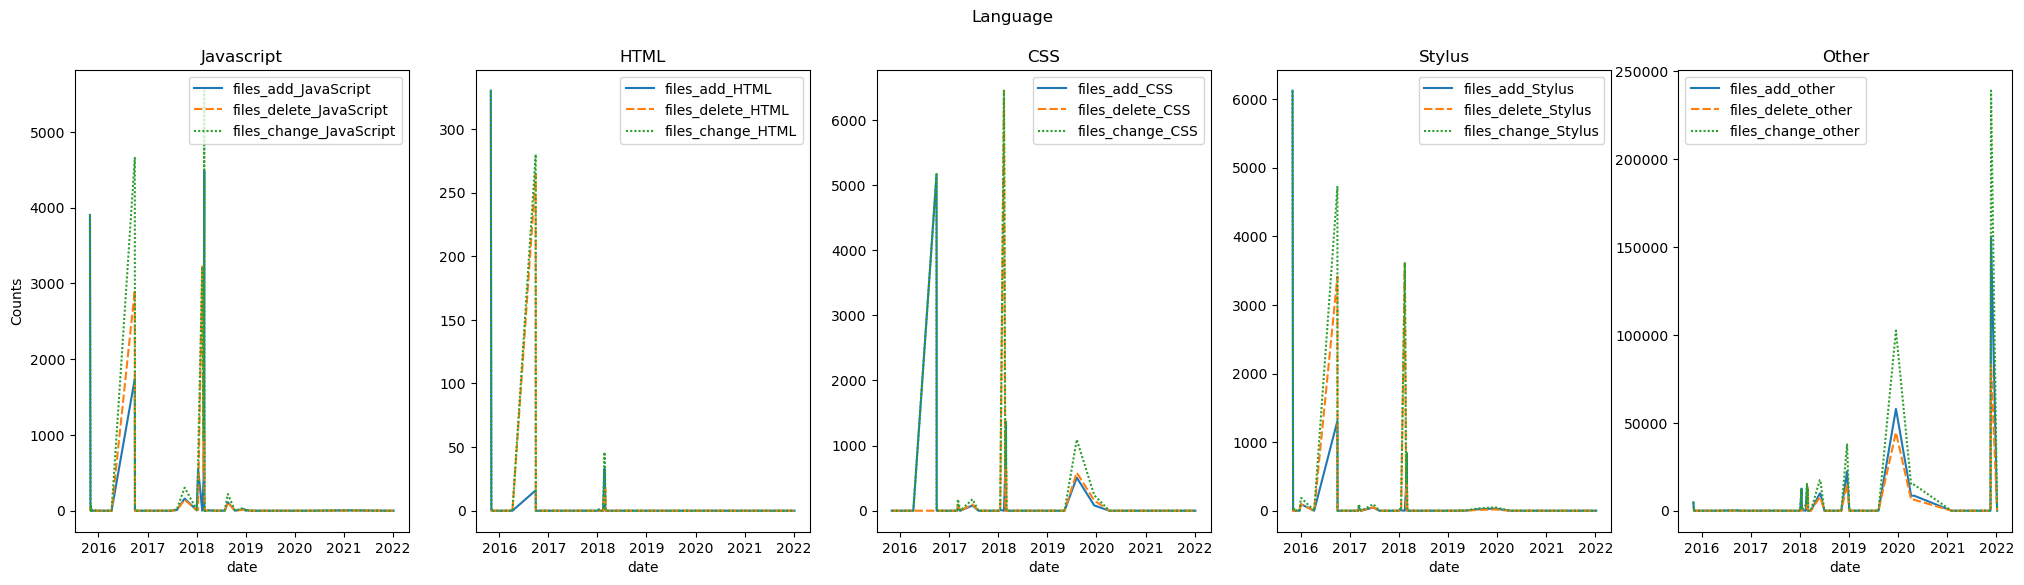

In [87]:
fig, ax = plt.subplots(1,5,figsize=(25,6))
ax[0] = sns.lineplot(data = df_g.loc[:,'files_add_JavaScript':'files_change_JavaScript'],ax = ax[0])
ax[0].set_title('Javascript')
ax[0].set_ylabel('Counts')

ax[1] = sns.lineplot(data = df_g.loc[:,'files_add_HTML':'files_change_HTML'],ax = ax[1])
ax[1].set_title('HTML')

ax[2] = sns.lineplot(data = df_g.loc[:,'files_add_CSS':'files_change_CSS'],ax = ax[2])
ax[2].set_title('CSS')

ax[3] = sns.lineplot(data = df_g.loc[:,'files_add_Stylus':'files_change_Stylus'],ax = ax[3])
ax[3].set_title('Stylus')

ax[4] = sns.lineplot(data = df_g.loc[:,'files_add_other':'files_change_other'],ax = ax[4])
ax[4].set_title('Other')
plt.suptitle('Language')
plt.show()

<Axes: xlabel='date'>

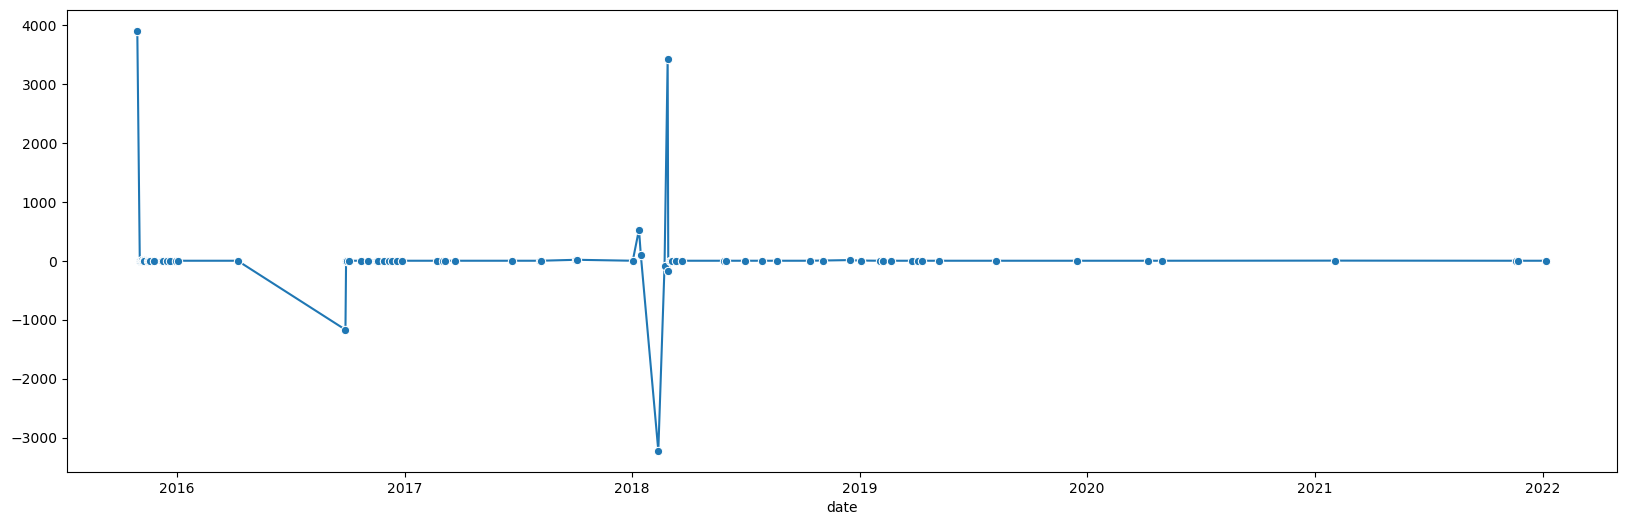

In [88]:
#ƒë·ªô l·ªách gi·ªØa add, delete 

fig = plt.figure(figsize=(20,6))
sns.lineplot(data = df_g.files_add_JavaScript - df_g.files_delete_JavaScript,marker = 'o')

In [89]:
# bi·ªÉu ƒë·ªì t∆∞∆°ng quan heatplot
corr = df_copy.corr(numeric_only = True)
mask = np.triu(np.ones_like(corr, dtype=bool), k=0)

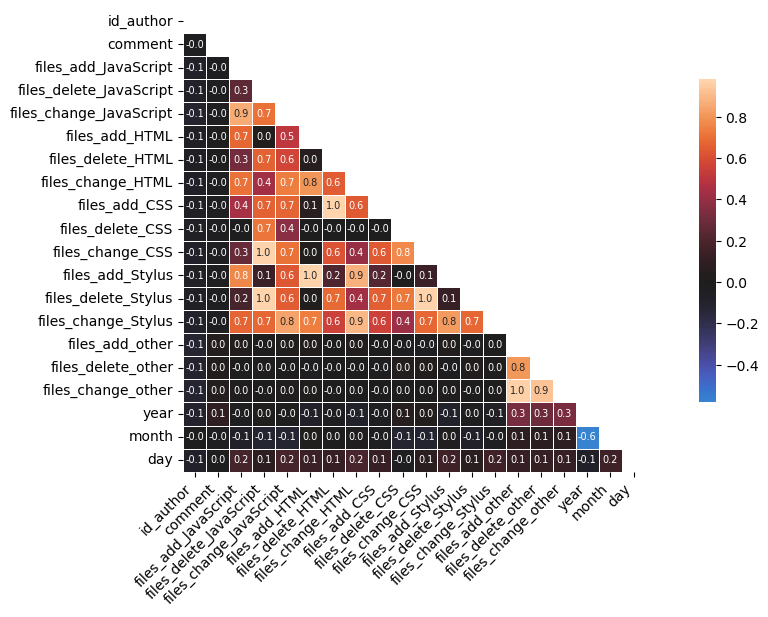

In [90]:
fig,ax = plt.subplots(figsize=(14,6))
ax = sns.heatmap(corr,mask = mask, annot = True,square = True,fmt = '.1f',center = 0,linewidths = 0.7,cmap = 'icefire',cbar_kws={'shrink':0.7},annot_kws = {'fontsize': 7})
ax.set_xticklabels(labels = ax.get_xticklabels(),rotation=45,ha = 'right')
plt.show()

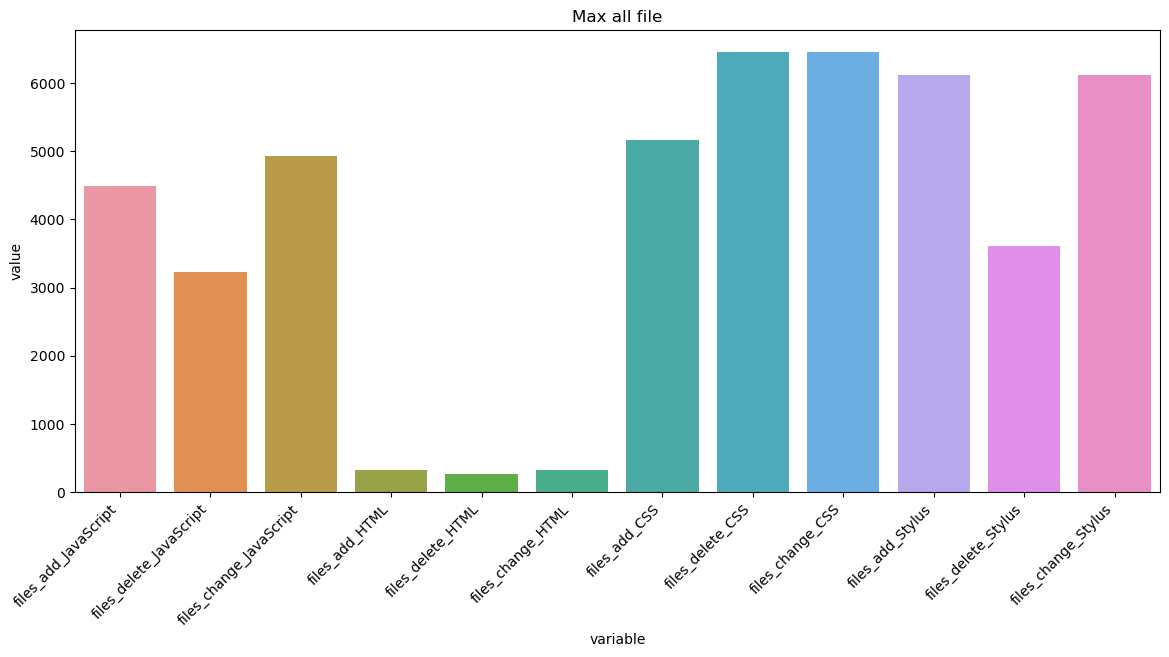

In [91]:
# barplot max file c√°c lo·∫°i
fig, ax = plt.subplots(figsize = (14,6))
sns.barplot(data = df_timegr,x = df_timegr.index,y='value')
ax.set_xticklabels(labels = ax.get_xticklabels(), rotation = 45, ha = 'right')
plt.title('Max all file')
plt.show()

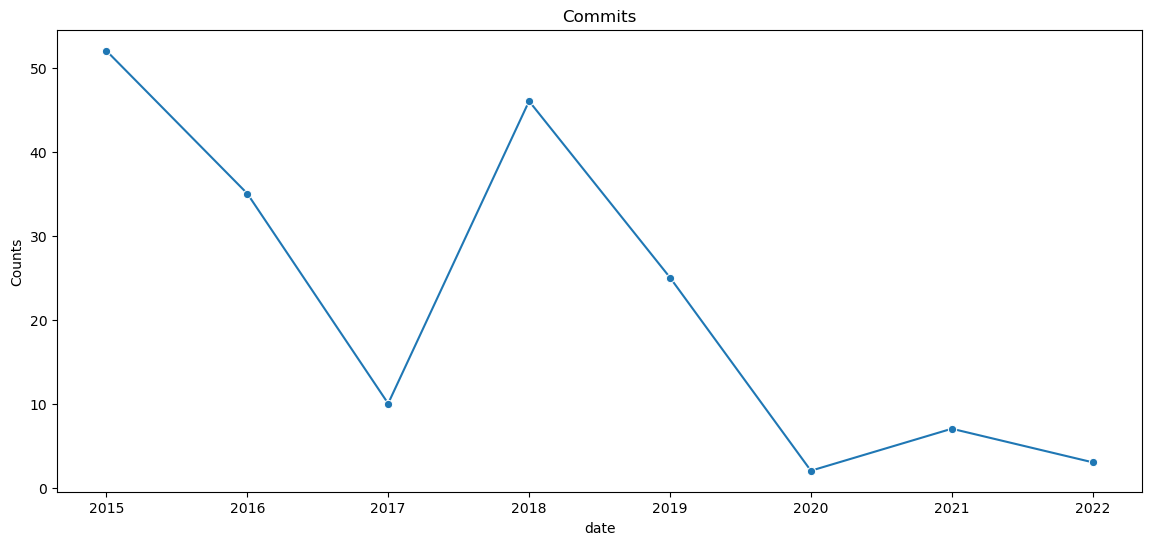

In [92]:
# s·ªë l∆∞·ª£ng commit thay ƒë·ªïi theo t·ª´ng nƒÉm
fig, ax = plt.subplots(figsize = (14,6))
sns.lineplot(data = df_cmyear,marker = 'o')
plt.title('Commits')
plt.ylabel('Counts')
plt.show()

In [93]:
# l∆∞·ª£ng commit theo t·ª´ng qu√Ω
df_copy['Quarter'] = df_copy.date.apply(lambda x: 1 if (x.month>=1 and x.month<=3) 
                              else 2 if (x.month>=4 and x.month<=6)
                              else 3 if (x.month>=7 and x.month<=9)
                              else 4)
df_q = df_copy.groupby(by = ['year','Quarter']).count().reset_index()
df_q = df_q[['year','Quarter','sha']]

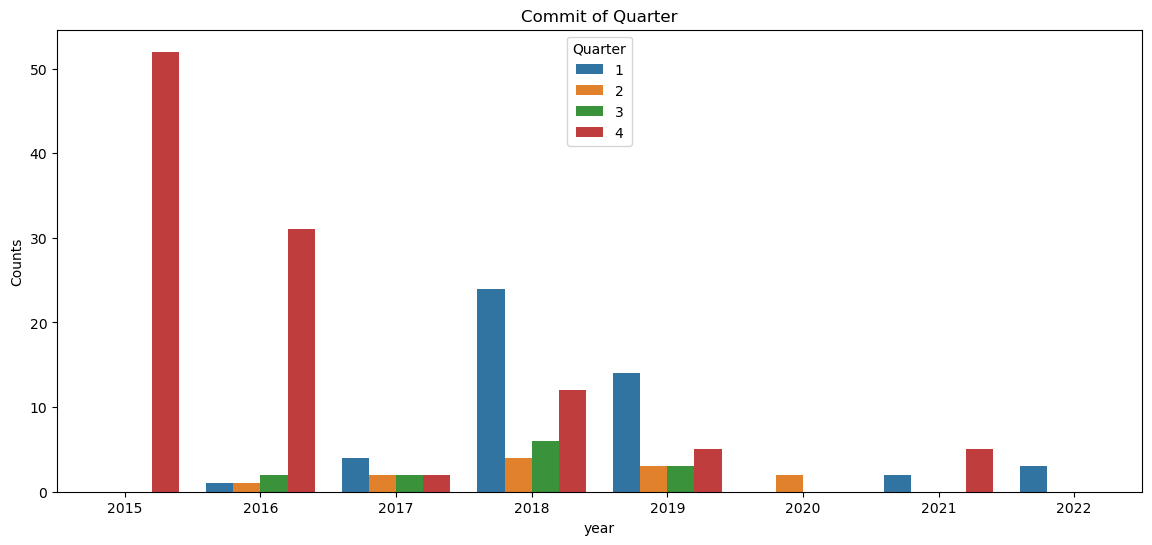

In [94]:
fig, ax = plt.subplots(figsize = (14,6))
sns.barplot(data = df_q,x = 'year',y='sha',hue = 'Quarter')
plt.ylabel('Counts')
plt.title('Commit of Quarter')
plt.show()

In [95]:
df_l = pd.melt(df,id_vars = ['name'],value_vars = ['files_change_JavaScript','files_change_HTML','files_change_CSS','files_change_Stylus','files_change_other'])
df_l = df_l.groupby(by = 'variable').sum(numeric_only = True)

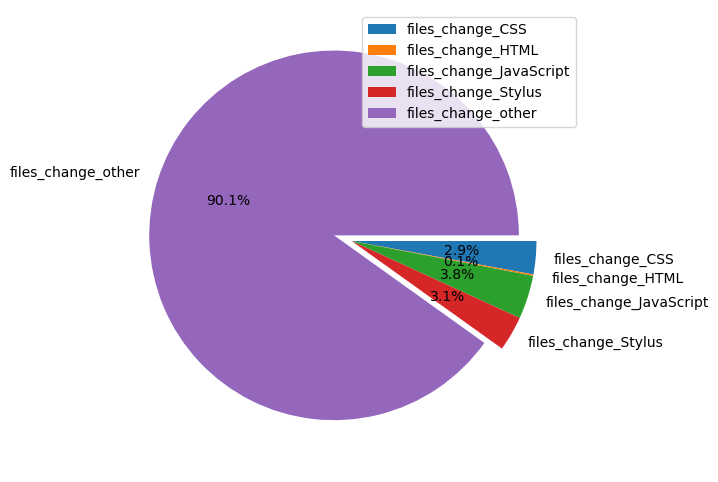

In [96]:
# bi·ªÉu ƒë·ªì tr√≤n t·ªâ l·ªá c√°c language
fig, ax = plt.subplots(figsize = (14,6))
explode = (0, 0, 0, 0,0.1)
plt.pie(x = df_l.value,autopct='%1.1f%%',labels = df_l.index,
        counterclock = False,explode = explode)
plt.legend(labels = df_l.index,loc = 'upper right')
plt.show()

In [97]:
# t·ªïng s·ªë d√≤ng thay ƒë·ªïi trong m·ªói l∆∞·ª£t commit
df_copy['files_change'] = df_copy[['files_change_JavaScript',
         'files_change_HTML',
         'files_change_CSS',
         'files_change_Stylus',
         'files_change_other']].sum(numeric_only = True, axis = 1)

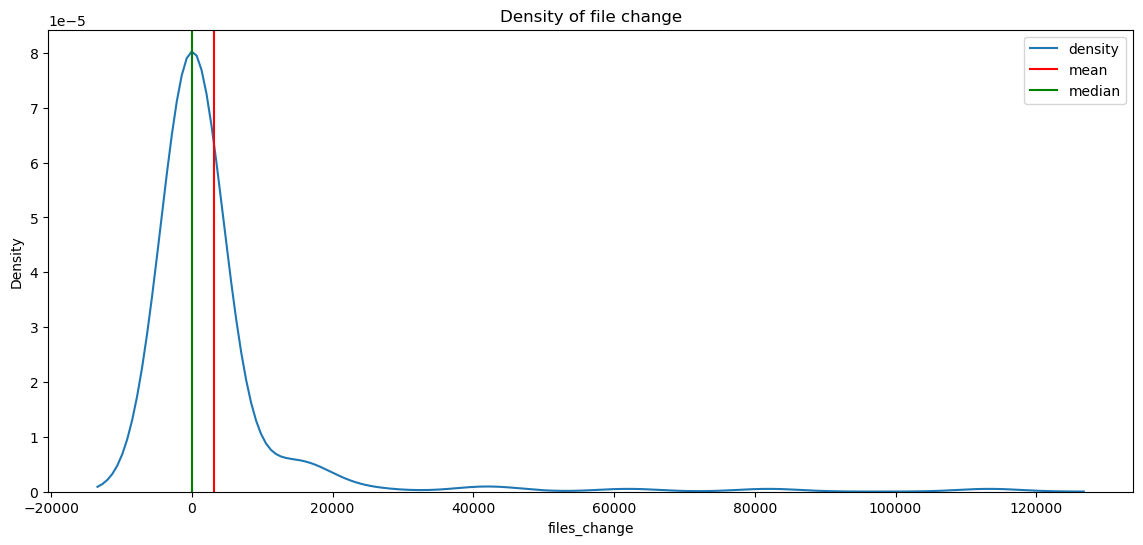

In [98]:
# bi·ªÉu ƒë·ªì m·∫≠t ƒë·ªô
fig, ax = plt.subplots(figsize = (14,6))
sns.kdeplot(data = df_copy['files_change'])
ax.axvline(df_copy['files_change'].mean(), color='red')
ax.axvline(df_copy['files_change'].median(), color='green')
plt.title('Density of file change')
plt.legend(labels = ['density','mean','median'])
plt.show()

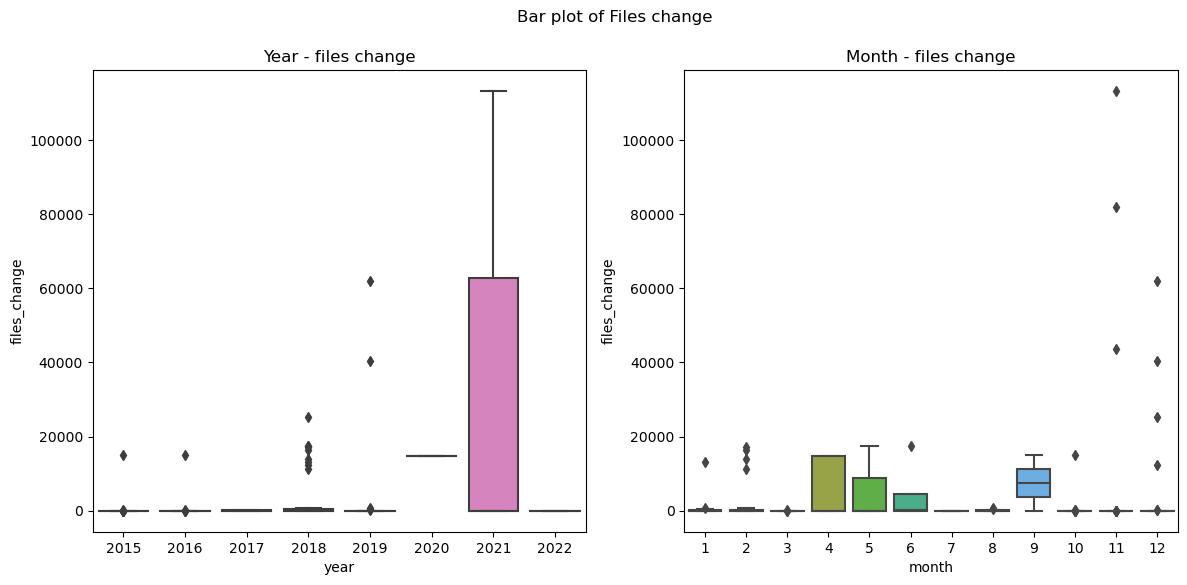

In [99]:
# box plot
fig, ax = plt.subplots(1,2,figsize = (14,6))
sns.boxplot(data = df_copy, x = 'year',y = 'files_change',ax = ax[0])
ax[0].set_title('Year - files change')

sns.boxplot(data = df_copy, x = 'month',y = 'files_change',ax = ax[1])
ax[1].set_title('Month - files change')
plt.suptitle('Bar plot of Files change ')
plt.show()

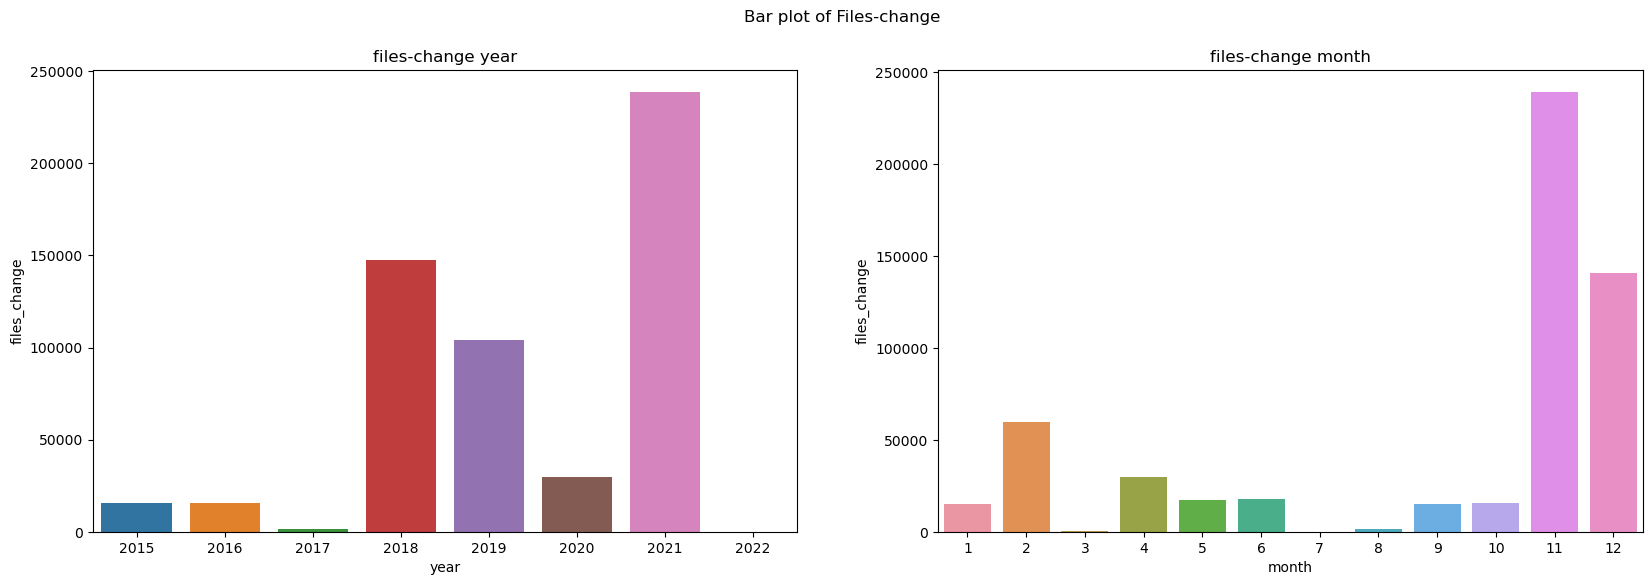

In [100]:
# files change theo th√°ng v√† files change theo nƒÉm
fig, ax = plt.subplots(1,2, figsize = (20,6))
df_bary = df_copy[['year','files_change']].groupby(by = ['year']).sum().reset_index()
sns.barplot(data = df_bary,x = 'year', y = 'files_change', ax = ax[0])
ax[0].set_title('files-change year')

df_barm = df_copy[['month','files_change']].groupby(by = ['month']).sum().reset_index()
sns.barplot(data = df_barm, x = 'month', y = 'files_change' , ax = ax[1])
ax[1].set_title('files-change month')

plt.suptitle('Bar plot of Files-change')
plt.show()